# SAIIE Workshop 05 October 2022
<p style="font-size:x-large;">Elementary introduction to Quantum Computing with Qiskit</p>

In this short introductory notebook, we will delve into the basic mathematics to describe classical and  quantum computation, whereupon notions such as _quantum logic gates_ and _quantum logic circuits_ will be introduced. Throughout the notebook, there will be Qiskit demonstrations supplementing the explainations of the concepts. And finally, we will have a look at a quantum algorithm called Grover's search quantum algorithm.

<h1>Table of Contents</h1>

The notebook is structured as follows:
1. Mathematics of computation
2. Quantum Computation with Qiskit: Notation, Qubits, Circuits, Measurements
5. Putting all together: Grover's quantum search  algorithm

# 1 Mathematics of computation

## 1.1 Boolean logic gates

The most basic processing unit is a conventional computer is the so-called a transistor.
In a nutshell, a transistor is an electronic switch, that either can block or pass current it
through.

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/transistor.svg" width="20%"  height="20%" />
</div>

These two states are abstractly associated with zero and one, respectively, and hence abstractly, the state of a transistor can be abstracted as a bit.  As such,  transistors can be composed with one another to make up _logic_ gates, which can perform basic Boolean operations. 

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/logic_gates.svg" width="50%"  height="50%" />
</div>

The figures above shows the two bit operations such as **AND**, **OR**, **NAND**, and **XOR** Boolean operations, respectively.  To reaffirm our knowledge of the aforesaid gates, let us go through the python operations that implement them and print out their truth tables 

In [236]:
import warnings
warnings.filterwarnings("ignore")

In [237]:
# import numpy 
import numpy as np

# import HTML, display for rendering raw html in a cell
from IPython.display import HTML, display

# diplsay HTML
def display_table(data, headers=None):
    html = "<table>"
    
    if headers:
        html += "<tr>"
        for header in headers:
            html += "<th><h4>{}</h4></th>".format(header)
        html += "<tr>"
    
    for row in data:
        html += "<tr>"
        for field in row:
            text = ""
            if field:
                text += "T"
            else:
                text += "F"
            html += "<td><h4>{}</h4></td>".format(text)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

In [238]:
# define AND, XOR, OR, NAND
def AND(truth_values):
    x = truth_values[:, 0]
    y = truth_values[:, 1]
    output = np.append(truth_values, np.logical_and(x, y).reshape((-1, 1)), axis=1)    
    return output

def XOR(truth_values):
    x = truth_values[:, 0]
    y = truth_values[:, 1]
    output = np.append(truth_values, np.logical_xor(x, y).reshape((-1, 1)), axis=1)    
    return output

def OR(truth_values):
    x = truth_values[:, 0]
    y = truth_values[:, 1]
    output = np.append(truth_values, np.logical_or(x, y).reshape((-1, 1)), axis=1)    
    return output

def NAND(truth_values):
    x = truth_values[:, 0]
    y = truth_values[:, 1]
    output = np.append(truth_values, np.logical_not(np.logical_and(x, y)).reshape((-1, 1)), axis=1)
    return output

In [239]:
## define possible truth values for two Boolean variables in a table
truth_values = np.array([
    [False, False],
    [False, True],
    [True, False],
    [True, True]
], dtype=bool)

In [240]:
display_table(AND(truth_values), headers=["X", "Y", "O"])

X,Y,O
F,F,F
F,T,F
T,F,F
T,T,T


In [241]:
display_table(XOR(truth_values), headers=["X", "Y", "O"])

X,Y,O
F,F,F
F,T,T
T,F,T
T,T,F


In [242]:
display_table(OR(truth_values), headers=["X", "Y", "O"])

X,Y,O
F,F,F
F,T,T
T,F,T
T,T,T


In [243]:
display_table(NAND(truth_values), headers=["X", "Y", "O"])

X,Y,O
F,F,T
F,T,T
T,F,T
T,T,F


Next in the hierarchy, we can combine logic gates to form
logic circuits that perform familiar operation such as adding two inputs, and eventually as we go up
the hierarchy, we can perform any mathematical operation, such as multiplication, division and so
on.

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/adder.svg" width="20%"  height="20%" />
</div>

In [244]:
def HALF_ADDER(truth_values):
    "Bit half adder"
    x = truth_values[:, 0]
    y = truth_values[:, 1]
    s = np.logical_xor(x,y).reshape((-1, 1))
    c = np.logical_and(x,y).reshape((-1, 1))
    output = np.append(truth_values, np.c_[s, c], axis=1)
    return output

In [245]:
display_table(HALF_ADDER(truth_values), headers=["X", "Y", "S", "C"])

X,Y,S,C
F,F,F,F
F,T,T,F
T,F,T,F
T,T,F,T


## 1.2 Representation of bits

Alternatively, we can describe  bits and on the logical operations defined on them in the language of linear algebra. In such a setting, the zero and one states correspond to unit vectors, $\mathbf{e}_1$, $\mathbf{e}_2$ in a inner product vector space $\mathcal{V}$

\begin{align}
 & \mathbf{e}_1 = \mathbf{0} := \begin{bmatrix} 1 & 0 \end{bmatrix}^{\mathsf{T}}, \\
 & \mathbf{e}_2  = \mathbf{1}: = \begin{bmatrix} 0 & 1 \end{bmatrix}^{\mathsf{T}} ,\\
 & \mathbf{e}_1^{\mathsf{T}} \mathbf{e}_2 = 0, \\
 & \mathbf{e}_1^{\mathsf{T}} \mathbf{e}_1 = \mathbf{e}_2^{\mathsf{T}}\mathbf{e}_2 = 1.
\end{align}

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/cl_bit_0.svg" width="20%"  height="20%" style="padding-right: 100px;" />
    <img src="./assets/cl_bit_1.svg" width="20%"  height="20%" />
</div>

In [246]:
# For pretty printing vectors and matrices
from qiskit.visualization import array_to_latex

In [247]:
# Define vector for '0' state
ZERO = np.array([[1], [0]])

# Pretty print vector
array_to_latex(ZERO)

<IPython.core.display.Latex object>

In [248]:
# Define vector for '1' state
ONE = np.array([[0], [1]])

# Pretty print vector
array_to_latex(ONE)

<IPython.core.display.Latex object>

### 1.2.1 Identity operator

In [249]:
# Define matrix for identity operator
IDENTITY = np.array([
    [1, 0],
    [0, 1]
])

# Pretty print identity operator
array_to_latex(IDENTITY)

<IPython.core.display.Latex object>

#### 1.2.1.1 Action of identity on zero state

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/identity_0.svg" width="35%"  height="35%" />
</div>

In [250]:
# Operate on '0' state with identity operator
identity_dot_zero = np.dot(IDENTITY, ZERO)

# Pretty print output vector
array_to_latex(identity_dot_zero)

<IPython.core.display.Latex object>

#### 1.2.1.2 Action of identity on one state

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/identity_1.svg" width="35%"  height="35%" />
</div>

In [251]:
# Operate on '1' state with identity operator
identity_dot_one = np.dot(IDENTITY, ONE)

# Pretty print output vector
array_to_latex(identity_dot_one)

<IPython.core.display.Latex object>

### 1.2.2 NOT operator

In [252]:
# Define matrix for NOT operator
NOT = np.array([
    [0, 1],
    [1, 0]
])

# Pretty print NOT operator
array_to_latex(NOT)

<IPython.core.display.Latex object>

#### 1.2.2.1 Action of NOT on zero state

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/not_0.svg" width="35%"  height="35%" />
</div>

In [253]:
# Operate on '0' state with NOT operator
not_dot_zero = np.dot(NOT, ZERO)

# Pretty print output vector
array_to_latex(not_dot_zero)

<IPython.core.display.Latex object>

#### 1.2.2.2 Action of NOT on zero state

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/not_1.svg" width="35%"  height="35%" />
</div>

In [254]:
# Operate on '1' state with NOT operator
not_dot_one = np.dot(NOT, ONE)

# Pretty print output vector
array_to_latex(not_dot_one)

<IPython.core.display.Latex object>

### 1.2.3 Constant ZERO

In [255]:
# Define matrix for CONSTANT-ZERO operator
CONSTANT_ZERO = np.array([
    [1, 1],
    [0, 0]
])

# Pretty print NOT operator
array_to_latex(CONSTANT_ZERO)

<IPython.core.display.Latex object>

In [256]:
# Operate on '0' state with CONSTANT-ZERO operator
constant_zero_dot_zero = np.dot(CONSTANT_ZERO, ZERO)

# Pretty print output vector
array_to_latex(constant_zero_dot_zero)

<IPython.core.display.Latex object>

In [257]:
# Operate on '1' state with CONSTANT-ZERO operator
constant_zero_dot_one = np.dot(CONSTANT_ZERO, ONE)

# Pretty print output vector
array_to_latex(constant_zero_dot_one)

<IPython.core.display.Latex object>

### Exercise

In [258]:
# Define matrix for CONSTANT-ONE operator
# CONSTANT_ONE = ...

Both constant-zero and constant-one operations are non-reversible operations, that is, knowing only the output we cannot infer what the input to the operation was. This is becasue both constant-zero and constant-one erase and/or overwrite information. While on the other hand, both identity and NOT operations are reversible operations, knowing the output of the gate, we can directly infer what the input was. For our purposes, we particularly care about reversible operations as quantum logic gates (we will see later in the notebook) and during the talk are reversible operations. 

### 1.3 Representation of multiple bits

#### 1.3.1 Kronecker products

In this new language of ours of matrices and vectors, we can represent multiple bits from prior definitions through a mathematical operation called a **Kronecker product**, sometimes denoted by $\otimes$. The Kronecker product operations on two matrices (or vectors) of arbitrary size resulting in a block matrix.  If $\mathbf{A}$ is an $m \times  n$ matrix and $\mathbf{B}$ is a $p \times q$ matrix, then the Kronecker product of $\mathbf{A}$ and $\mathbf{B}$, denoted as $\mathbf{A} \otimes  \mathbf{B}$ is the  $pm \times qn$ block matrix:

$$
\mathbf{A} \otimes \mathbf{B} = \begin{bmatrix} \mathbf{A}_{11} \mathbf{B} & \cdots & \mathbf{A}_{1n} \mathbf{B}  \\ \vdots & \ddots & \vdots \\ \mathbf{A}_{m1} & \cdots & \mathbf{A}_{mn} \mathbf{B} \end{bmatrix}
$$

In `numpy`, the  kronecker product of two arrays is implemented by `numpy.kron(e1,e2)`.

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/ket_00.svg" width="35%"  height="35%" />
</div>

In [259]:
ZERO_ZERO = np.kron(ZERO, ZERO)

# Pretty print output vector
array_to_latex(ZERO_ZERO)

<IPython.core.display.Latex object>

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/ket_01.svg" width="35%"  height="35%" />
</div>

In [260]:
ZERO_ONE = np.kron(ZERO, ONE)

# Pretty print output vector
array_to_latex(ZERO_ONE)

<IPython.core.display.Latex object>

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/ket_10.svg" width="35%"  height="35%" />
</div>

In [261]:
ONE_ZERO = np.kron(ONE, ZERO)

# Pretty print output vector
array_to_latex(ONE_ZERO)

<IPython.core.display.Latex object>

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/ket_11.svg" width="35%"  height="35%" />
</div>

In [262]:
ONE_ONE = np.kron(ONE, ONE)

# Pretty print output vector
array_to_latex(ONE_ONE)

<IPython.core.display.Latex object>

### 1.3.2 Multi-bit operations: controlled-NOT operation

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/cX_circ.svg" width="30%"  height="30%" />
</div>

In [263]:
def cNOT(truth_values):
    "controlled NOT"
    ci = truth_values[:, 0]
    ti = truth_values[:, 1]
    to = np.logical_xor(ci,ti).reshape((-1, 1))
    output = np.append(truth_values, np.c_[ci, to], axis=1)
    return output

In [264]:
display_table(cNOT(truth_values), headers=['ci', "ti", "co", "to"])

ci,ti,co,to
F,F,F,F
F,T,F,T
T,F,T,T
T,T,T,F


### 1.3.3 controlled-NOT operator

In [265]:
# 2 by 2 matrix of zeros
ZEROS = np.zeros((2, 2))

# define cNOT operator
cNOT = np.block([
    [IDENTITY, ZEROS],
    [ZEROS, NOT]
])

# Pretty print cNOT operator
array_to_latex(cNOT)

<IPython.core.display.Latex object>

#### 1.3.3.1 Action cNOT on 00

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/cX_00.svg" width="35%"  height="35%" />
</div>

In [266]:
# Operate on '00' state with cNOT operator
cnot_dot_zero_zero = np.dot(cNOT, ZERO_ZERO)

# Pretty print output vector
array_to_latex(cnot_dot_zero_zero)

<IPython.core.display.Latex object>

#### 1.3.3.2 Action cNOT on 01

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/cX_01.svg" width="35%"  height="35%" />
</div>

In [267]:
# Operate on '01' state with cNOT operator
cnot_dot_zero_one = np.dot(cNOT, ZERO_ONE)

# Pretty print output vector
array_to_latex(cnot_dot_zero_one)

<IPython.core.display.Latex object>

#### 1.3.3.3 Action cNOT on 10

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/cX_10.svg" width="35%"  height="35%" />
</div>

In [268]:
# Operate on '10' state with cNOT operator
cnot_dot_one_zero = np.dot(cNOT, ONE_ZERO)

# Pretty print output vector
array_to_latex(cnot_dot_one_zero)

<IPython.core.display.Latex object>

#### 1.3.3.4 Action cNOT on 11

<div  style="text-align: center; padding: 20px 0px;">
    <img src="./assets/cX_11.svg" width="35%"  height="35%" />
</div>

In [269]:
# Operate on '11' state with cNOT operator
cnot_dot_one_one = np.dot(cNOT, ONE_ONE)

# Pretty print output vector
array_to_latex(cnot_dot_one_one)

<IPython.core.display.Latex object>

 ## 2. Quantum Computation with Qiskit

Here, we provide an overview of working with Qiskit. Qiskit provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the quantum circuit. A basic workflow using Qiskit consists of two stages: Build and Run. Build allows you to make different quantum circuits that represent the problem you are solving, and Run that allows you to run them on different backends. After the jobs have been run, the data is collected and postprocessed depending on the desired output.

In [270]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

### 2.1 Operations on single qubits

The basic element needed for your first program is the `QuantumCircuit`. We begin by creating a `QuantumCircuit` comprised of a single qubit. After you create the circuit with its registers, you can add gates (“operations”) to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits;  below is an example of a quantum circuit that applies a NOT/X to a qubit initialized as the state zero (By default, each qubit in the register is initialized to $|0\rangle$)

### 2.1.1 NOT gate

\begin{align}
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\end{align}

In [271]:
# Create quantum circuit with 1 qubit
circ_not_zero = QuantumCircuit(1)

# apply X gate to qubit
circ_not_zero.x(0)

You can visualize your circuit using Qiskit `QuantumCircuit`, which plots the circuit in the form found in many textbooks.

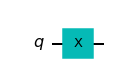

In [272]:
# draw circuit
circ_not_zero.draw(output="mpl")

In this circuit, the qubits are put in order, with qubit zero at the top (and qubit one would have been below qubit zero if there two qubits in the circuit). The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

To simulate a circuit we use `Statevector` from the quantum_info module in Qiskit. This simulator returns the quantum state, which is a complex vector of dimensions , where  is the number of qubits (so be careful using this as it will quickly get too large to run on your machine). We can use `Statevector` by simply providing it with a quantum circuit as input.

In [273]:
sv_circ_not_zero = Statevector(circ_not_zero)

# draw statevector as a vector
array_to_latex(sv_circ_not_zero.data.reshape(-1, 1))

<IPython.core.display.Latex object>

As expected,  we recover the state vector for $|1\rangle$ as the $X$ gate's action flips a single qubit state. Now let's look at a few  more examples:

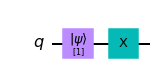

In [274]:
# Create quantum circuit with 1 qubit
circ_not_one = QuantumCircuit(1)

# initialize qubit as 0
circ_not_one.initialize(1)

# apply X gate to qubit
circ_not_one.x(0)

# draw circuit
circ_not_one.draw(output="mpl")

In [275]:
array_to_latex(Statevector(circ_not_one).data.reshape(-1, 1))

<IPython.core.display.Latex object>

### 2.1.3 Hadamard gate

\begin{align}
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{align}

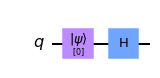

In [276]:
# Create quantum circuit with 1 qubit
circ_hadamard_zero = QuantumCircuit(1)

# initialize qubit as 0
circ_hadamard_zero.initialize(0)

# apply H gate to qubit
circ_hadamard_zero.h(0)

# draw circuit
circ_hadamard_zero.draw(output="mpl")

In [277]:
array_to_latex(Statevector(circ_hadamard_zero).data.reshape(-1, 1))

<IPython.core.display.Latex object>

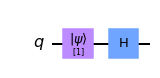

In [278]:
# Create quantum circuit with 1 qubit
circ_hadamard_one = QuantumCircuit(1)

# initialize qubit as 0
circ_hadamard_one.initialize(1)

# apply H gate to qubit
circ_hadamard_one.h(0)

# draw circuit
circ_hadamard_one.draw(output="mpl")

In [279]:
array_to_latex(Statevector(circ_hadamard_one).data.reshape(-1, 1))

<IPython.core.display.Latex object>

### 2.2 Measurements

 Real experiment terminates by measuring each qubit (usually in the computational  basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits.  For example, suppose we make a measurement on a uninitialized qubit $|\psi\rangle = |0\rangle$.

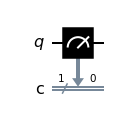

In [280]:
# Create quantum circuit with 1 qubit and 1 classical bit
circ_with_measurements = QuantumCircuit(1, 1)
 
# measure qubit 0 and store it's measurement outcome in classical bit 0
circ_with_measurements.measure(0,0)

# draw circuit
circ_with_measurements.draw(output="mpl")

According to Born Rule's, the the probability of obtaining outcome  $|0\rangle $is given by:

\begin{align}
    P(0) = |\langle 0| \psi \rangle|^2 = |\langle 0 | 0 \rangle|^2 = 1
\end{align}

To simulate a circuit that includes measurement, we can use an`Aer` backend, called `qasm_simulator`.

In [281]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

# import backend for simulating measurement outcomes
backend = Aer.get_backend('qasm_simulator')

To simulate this circuit, we use the `qasm_simulator` in Qiskit Aer. Each run of this circuit will yield either the bitstring as measurement outcome. To build up statistics about the distribution of the bitstrings (to, e.g., estimate ), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the `execute` function, via the `shots` keyword.

In [282]:
# run circuit 1024 times on the simulator to accumulate a probability distribution of the 1024 measurement outcomes
z_meas_result = execute(circ_with_measurements, backend=backend, shots=1024).result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the aggregated binary outcomes of the circuit you submitted.

In [283]:
z_meas_counts = z_meas_result.get_counts()

print(z_meas_counts)

{'0': 1024}


As expected, `100%` percent of the time, the bitstring '0' corresponding to the meausrement outcome of '0' on qubit zero. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes

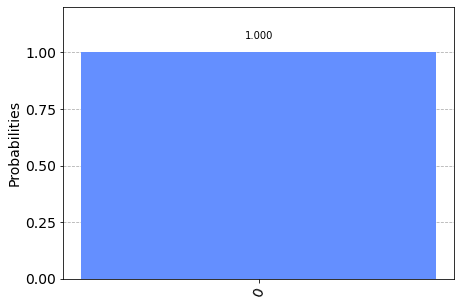

In [284]:
# plot a histogram of the measurement outcomes
plot_histogram(z_meas_counts)

The estimated outcome probabilities are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Similarly, repeating the above steps, but this time initializing qubit zero to $|1\rangle$.

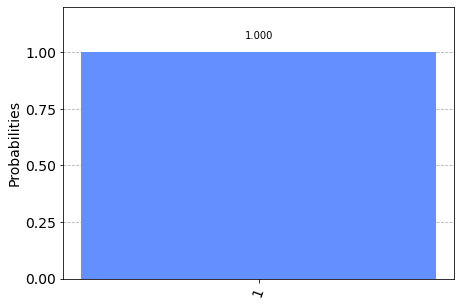

In [285]:
# Create quantum circuit with 1 qubit and 1 classical bit
circ = QuantumCircuit(1, 1)

# applyq X to qubit
circ.x(0)

# measure qubit
circ.measure(0,0)

# run circuit 1024 times on the simulator to accumulate a probability distribution of the 1024 measurement outcomes
z_meas_counts = execute(circ, backend=backend, shots=1024).result().get_counts()

# plot a histogram of the measurement outcomes
plot_histogram(z_meas_counts)

Hundred percent of the time, we obtain the bitstring '1' corresponding to the meausrement outcome of '1' on qubit zero. Let's take a look at one more example. Suppose we make measurements on a qubit prepared in the following superposition state:
 
 \begin{align}
     |\psi\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
 \end{align}

Recall the probability of obtaining an outcome $x$ is given by:

\begin{align}
    P(x) = |\langle x|\psi\rangle|^2 
\end{align}

For the state above, the probabilities of obtaining the measurement outcomes $0$ or $1$ are both $\frac{1}{2}$:

\begin{align}
    P(0) =  \langle 0 | \psi \rangle|^2 = | \frac{1}{\sqrt{2}} \langle 0|0\rangle + \frac{1}{\sqrt{2}} \langle 0 | 1 \rangle  |^2  = \frac{1}{2} |1 + 0|^2 = \frac{1}{2}, \\
    P(1) =  \langle 1 | \psi \rangle|^2 = | \frac{1}{\sqrt{2}} \langle 1|0\rangle + \frac{1}{\sqrt{2}} \langle 1 | 1 \rangle  |^2  = \frac{1}{2} |0 + 1|^2 = \frac{1}{2},
\end{align}

To simulate a circuit that includes measurement of the above state, we follow similar steps as before

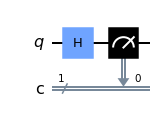

In [286]:
# Create quantum circuit with 1 qubit and 1 classical bit
circ_superposition = QuantumCircuit(1, 1)

# apply H to qubit 0, which prepares it in a superposition state.
circ_superposition.h(0)

# measure qubit
circ_superposition.measure(0,0)

# draw circuit
circ_superposition.draw(output="mpl")

In [287]:
# run circuit 1024 times on the simulator to accumulate a probability distribution of the 1024 measurement outcomes
z_meas_result = execute(circ_superposition, backend=backend, shots=1024).result()

In [288]:
z_meas_counts = z_meas_result.get_counts()

print(z_meas_counts)

{'0': 514, '1': 510}


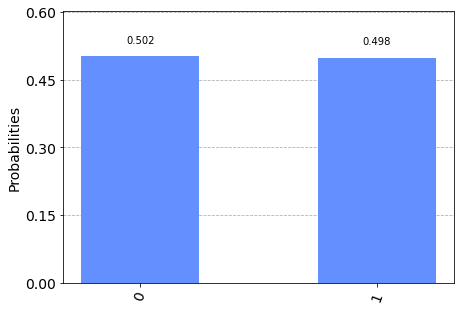

In [289]:
plot_histogram(z_meas_counts)

Approximately 50 percent of the time, the measurement outcome 0, and 50 percent of the time we obtain the measurement outcome 1,and which of these will occur, we cannot predict before the measurement. The popular phrase, is that the state of the qubits is both of these states at the same time.

### Exercise

In [290]:
# First,  let's get familiar with measuring qubits
# Create quantum circuit with 1 qubit and 1 classical bit
circ = QuantumCircuit(1, 1)

# apply X to qubit
# ...

# apply H to qubit
# ..

# measure qubit
# ..

# draw circuit
# ..

In [291]:
# run circuit 1024 times on the simulator to accumulate a probability distribution of the 1024 measurement outcomes
# ..

# before running the experiment, what do you expect to see?
# plot a histogram of the measurement outcomes
# ..

## 3.3 Grokking the Bloch Sphere

In [318]:
from IPython.display import IFrame

IFrame("https://javafxpert.github.io/grok-bloch/",'100%', 700)

The symbols shown on the right hand side of the `iframe` above are quantum logic gates defined as:

\begin{align}
&X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  \>\>
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}  \>\>
S = \begin{bmatrix} 1 & 0 \\ 0 & e^{i \pi/2} \end{bmatrix} \>\>
T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i \pi/4} \end{bmatrix} \>\>
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \\
& R_{x} = \begin{bmatrix} \cos{\theta/2} & -i\sin{\theta/2}  \\ -i\sin{\theta/2} & \cos{\theta/2} \end{bmatrix} \>\>
R_{y} = \begin{bmatrix} \cos{\theta/2} & -\sin{\theta/2}  \\ \sin{\theta/2} & \cos{\theta/2} \end{bmatrix} \>\>
R_{z} = \begin{bmatrix} e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2}\end{bmatrix}
\end{align}

### 3.3 Entanglement

#### 3.3.1  Product states

We have previously seen that, by starting with two general single qubit states $|\psi\rangle$, $|\phi\rangle$, we can write a general two-qubit _product_ state as:

\begin{align}
    |\psi\rangle \otimes |\phi\rangle  = \begin{bmatrix} \alpha_1 \\ \beta_1 \end{bmatrix} \otimes \begin{bmatrix} \alpha_2 \\ \beta_2 \end{bmatrix} = \begin{bmatrix} \alpha_1\alpha_2 \\ \alpha_1\beta_2 \\ \beta_1\alpha_2 \\ \beta_1\beta_2\end{bmatrix} = \alpha_1\alpha_2 |0\rangle \otimes |0\rangle + \alpha_1\beta_2|0\rangle \otimes |1\rangle + \beta_1\alpha_2 |1\rangle \otimes |0\rangle + \beta_1\beta_2|1\rangle \otimes |1\rangle.
\end{align}

For example, choosing $\alpha_1 = \beta_1 = 1/\sqrt{2}$ and $\alpha_2 = 1, \beta_2 = 0$, gives the following product state:

\begin{align}
    |\Psi\rangle = \frac{1}{\sqrt{2}} (|0\rangle \otimes |0\rangle + |1\rangle \otimes |0\rangle).
\end{align}

We can factorize as:

\begin{align}
|\Psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle,
\end{align}

we observe that it is a product state of $|\psi\rangle = 1/\sqrt{2} (|0\rangle + |1\rangle)$ and  $|\phi\rangle = |0\rangle$.

### 3.3.2 Entangled states

In addition to product states, there is a class of multi-qubit states that cannot be written as a product state of single qubit states; such states are called _entangled_ states. An example of an entangled state is one of the Bell states $|\Phi^{+}\rangle$, which is given by:

\begin{align}
|\Phi^{+}\rangle = \frac{1}{\sqrt{2}} (|0\rangle\otimes|0\rangle + |1\rangle\otimes|1\rangle)
\end{align}

There are no pairs of single qubit states $|\psi\rangle$ and $|\phi\rangle$ whose product state would look like the above state. Try it; find $\alpha_1, \beta_1, \alpha_2, \beta_2$ such that

\begin{align}
    \alpha_1\alpha_2 |0\rangle \otimes |0\rangle + \alpha_1\beta_2|0\rangle \otimes |1\rangle + \beta_1\alpha_2 |1\rangle \otimes |0\rangle + \beta_1\beta_2|1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}}(|0\rangle\otimes|0\rangle + |1\rangle\otimes|1\rangle)
\end{align}

**Hint**: It's impossible!

One of the peculiarities of entanglement is that the measurement outcomes of entangled qubits are mathematically correlated. These correlations are different from the ones we encounter in ordinary life, in that, whenever you influence an entangled qubit by act of measuring, it also influences the measurement outcomes of the other qubits that are entangled with it, _instantaneously_ across spacetime! Entanglement is a key ingredient of many aspects of quantum computing. It powers the algorithms and methods that we use, and it is a necessary part of any quantum advantage.

## 4.0 Grover's search quantum algorithm

In this secton, we will put together what we have learned thus far and walk through an example of Grover's quantum search algorithm.

### Problem statement

Suppose we are given a indexable list of $N$ elements, for simplicity, without loss of generality, we shall take $N$ to be a power of two, _i.e_ $N=2^n$.  We wish to search through it, and find an index $x \in [0, N-1]$ belonging to an item in the list satisfying a some criterion. Such a criterion can be conveniently represented by a function $f: \{0,1,\ldots, N-1\} \to \{0, 1\}$, which takes as input an integer $x$, in the range $0$ to $N − 1$; such that $f(x) = 1$ if $x$ is the index of the item satisfying criterion, and $f(x) = 0$ otherwise. For simplicity, we will also assume that there is one element for which $f(x) = 1$, and denote it by $\bar{x}$. In such a scenario, we can express the criterion $f$ mathematically as:

\begin{align}
    f(x) = 
    \begin{cases}
    1 & x=\bar{x}, \\
    0 & x\neq\bar{x}
    \end{cases}
\end{align}

#### Problem analogy:

On one faithful day, you happen to have locked yourself out of the laboratory and for some reason urgently need to access to your laboratory. To worsen your woes, you realize that you completely forgot the lock combination, but luckily you happen to recall that the lock in question uses a lock-mechanism as the one shown below; it has $n$-switches each of which has an “on” and “off ” setting, and the lock combination that unlocks your laboratory is some unique configuration $\bar{x}$ of the $n$ switches, with each being either set to either “on” or “off ”.

<div>
    <img src="./assets/switches.svg" width="100%"  height="100%" />
</div>

#### In sum:

Given an indexable list of $N$ element, find the index $\bar{x}$ corresponding to an element that uniquely satifies the criterion $f$ _i.e._ $f(\bar{x}) = 1$.

### Classical solution

If you don’t have any a prior knowledge of the configuration $\bar{x}$, the best you can do is to simply employ a guess and check strategy, _i.e._ randomly try a configuration you have not tried yet and check if it opens the lock. For example, you try the below combination:

<div>
    <img src="./assets/switches_comb.svg" width="100%"  height="100%" />
</div>

In the worst-case scenario where you exhaust all $2^n$ combinations until you find $\bar{x}$. The worst-case behaviour of such a strategy is to scale exponentially with the $n$, the number of switches in the lock mechanism, and denoted in $\textsf{big-O}$ by $\mathcal{O}(2^n)$

### Quantum solution

#### Search space mapping 

This particular instance of the search problem can mapped in a straightforward way, that is, we assign each index $x$ to correspond to each computational basis state $|x\rangle$ in our $n$ qubit register.

#### Encoding the criterion: Oracle

As a consequence of this mapping, the next issue we need to grapple with, is how do we realize the criterion $f$ for the mapped search space where each element is associated with quantum states? Grover's quantum search algorithm [3] realizes the criterion $f$ as a quantum circuit $U_{O}$ that changes the _phase_ of the quantum state corresponding to the solution to the search problem $\bar{x}$. The action of the quantum circuit $U_{O}$ on an arbitrary $|x\rangle$ basis state is given by:

\begin{align}
|x\rangle \stackrel{U_{O}}{\to}  (-1)^{f(x)}|x\rangle
\end{align}

where $f$ is defined as before: 

\begin{align}
 f(x) = 
 \begin{cases}
  1 & x=\bar{x}, \\
  0 & x\neq\bar{x}
 \end{cases}
\end{align}

Using this definition, we can define $U_{O}$ similarly:

\begin{align}
 U_{O}|x\rangle = 
 \begin{cases}
  (-1)^{f(x)}=(-1)^{1} = -|x\rangle  & x=\bar{x}, \\
  (-1)^{f(x)}=(-1)^{0} = |x\rangle & x\neq\bar{x}
 \end{cases}
\end{align}

As alluded to earlier, we see that $U_{O}$ changes the phase of the quantum state corresponding to the solution to the search problem, leaving the rest unchanged. Such a quantum circuit $U_O$ is represented by a diagonal matrix with $1$'s on the diagonal except the entry associated $\bar{x}$, which has a $-1$. For instance, in the case where the solution to the search problem correspond to $|\bar{x}\rangle =|1\rangle$, then $U_{O}$ takes the form:


\begin{align}
    U_O =
 \begin{bmatrix}
   (-1)^{f(0)} & 0  & 0 & \cdots & 0 \\
   0 & (-1)^{f(1)} & 0 & \cdots & 0 \\
   0 & 0  & (-1)^{f(2)}      & \cdots & 0 \\
   \vdots & \vdots  & \vdots  & \ddots & \vdots  \\
   0 & 0 & \cdots & 0 & (-1)^{f(2^n -1)} 
 \end{bmatrix}
 =
 \begin{bmatrix}
   1 & 0  & 0 & \cdots & 0 \\
   0 & -1 & 0 & \cdots & 0 \\
   0 & 0  & 1      & \cdots & 0 \\
   \vdots & \vdots  & \vdots  & \ddots & \vdots  \\
   0 & 0 & \cdots & 0 & 1 
 \end{bmatrix}
\end{align}

#### Constructing oracle circuit in Qiskit

Consider as an example a search space of modest size $N=2^2=4$. Such a search space can be mapped to two qubits, and the $4$ elements correspond to the $4$ basis states for two-qubit system: $|00\rangle,|10\rangle,|01\rangle \text{ and }|11\rangle$ ($|0\rangle, |1\rangle, |2\rangle \text{ and }|3\rangle$). We can use Qiskit to construct an parametrized oracle circuit for an arbitrary solution element in this space:

In [293]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

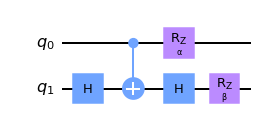

In [294]:
# Create quantum circuit with 2 qubits and name it U_O
U_O = QuantumCircuit(2, name="U_O")

# initialize parameters alpha and beta
alpha = Parameter("α")
beta = Parameter("β")

# build oracle circuit 
U_O.h(1)
U_O.cx(0, 1)
U_O.h(1)

U_O.rz(alpha, 0)
U_O.rz(beta, 1)

U_O.draw(output="mpl")

The above circuit corresponds to the matrix

\begin{align}
U_{O} = 
    \begin{bmatrix}
    e^{-i(\alpha + \beta)/2} & 0 & 0 & 0 \\
    0 & e^{-i(\alpha - \beta)/2} & 0 & 0  \\
    0 & 0 & e^{+i(\alpha - \beta)/2} & 0 \\
    0 & 0 & 0 & -e^{+i(\alpha + \beta)/2}
    \end{bmatrix}
\end{align}

With the values for $(\alpha, \beta)$ as  $(-\pi, -\pi), (0, -\pi), (-\pi, 0) \text{ and } (0,0)$, we can algebraically verify that $U_{O}$ changes the phase of $|00\rangle, |10\rangle, |01\rangle, |11\rangle$ respectively. Consider $(\alpha,\beta)=(0,0)$

\begin{align}
U_{O} = 
   \begin{bmatrix}
    e^{-i(0 + 0)/2} & 0 & 0 & 0 \\
    0 & e^{-i(0 - 0)/2} & 0 & 0  \\
    0 & 0 & e^{+i(0 - 0)/2} & 0 \\
    0 & 0 & 0 & -e^{+i(0 + 0)/2}
   \end{bmatrix}
    =
   \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0  \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & -1
   \end{bmatrix}
\end{align}

All the diagonal entries are $1$, except the last diagonal entry corresponding to $|11\rangle$ has $-1$. Let's verify with Qiskit that is indeed also the case when apply the above parametrized circuit with $(\alpha, \beta) = (0, 0)$ to the state $|11\rangle$:

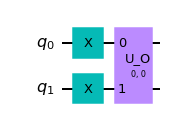

In [295]:
# Create quantum circuit with 2 qubit
circ_one_one = QuantumCircuit(2)

# apply x gates to both qubits 0 and 1
circ_one_one.x([0, 1])

# apply U_O with alpha and beta to both zero
circ_one_one.append(U_O.to_gate({ alpha: 0, beta: 0}), [0, 1])

# draw circuit
circ_one_one.draw(output="mpl")

In [296]:
array_to_latex(Statevector(circ_one_one).data.reshape(-1, 1))

<IPython.core.display.Latex object>

### Exercise

Verify the above parametrized circuit with $(\alpha, \beta) = (-\pi, -\pi)$ changes the phase of the state $|00\rangle$:

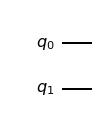

In [297]:
# Create quantum circuit with 2 qubits
circ_zero_zero = QuantumCircuit(2)

# initialize qubits to zero 
# ...

# apply U_O with alpha and beta to both π.
# ...

# draw circuit
circ_zero_zero.draw(output="mpl")

In [298]:
# print out state vector
# ...

#### Inversion about the average

Suppose we prepared one uniform superposition of all basis states as the initial state and proceeded to apply oracle operation $U_{O}$, in this imagined scenario the oracle changes the phase of $|11\rangle$. And finally performed measurements on both qubits, with the hope that we will measure the basis state with the relative sign (solution), we would be confronted with the following situation. Just before the measurement, the state of the two-qubit system is given by:

\begin{align}
|\psi \rangle = \frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle - |11\rangle\right)
\end{align}

Using Born's rule, we observe that probability of any of these states is equally probable despite the $|11\rangle$ having a relative phase in comparison to the rest:

\begin{align}
|\langle 00 | \psi \rangle|^2 = \left(\frac{1}{2}\right)^2 | \langle 00|00\rangle + \langle 00|01\rangle + \langle 00|10\rangle - \langle 00|11\rangle |^2 = \frac{1}{4}|1 + 0 + 0 - 0|^2 = \frac{1}{4} \\
|\langle 01 | \psi \rangle|^2 = \left(\frac{1}{2}\right)^2 | \langle 01|00\rangle + \langle 01|01\rangle + \langle 01|10\rangle - \langle 01|11\rangle |^2 = \frac{1}{4}|0 + 1 + 0 - 0|^2 = \frac{1}{4} \\
|\langle 10 | \psi \rangle|^2 = \left(\frac{1}{2}\right)^2 | \langle 10|00\rangle + \langle 10|01\rangle + \langle 10|10\rangle - \langle 10|11\rangle |^2 = \frac{1}{4}|0 + 0 + 1 - 0|^2 = \frac{1}{4} \\
|\langle 11 | \psi \rangle|^2 = \left(\frac{1}{2}\right)^2 | \langle 11|00\rangle + \langle 11|01\rangle + \langle 11|10\rangle - \langle 11|11\rangle |^2 = \frac{1}{4}|0 + 0 + 0 - 1|^2 = \frac{1}{4}
\end{align}

Let's us verify with Qiskit:

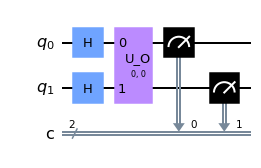

In [299]:
# Create quantum circuit with 2 qubits and 2 classical bits
circ_after_inv = QuantumCircuit(2, 2)

# apply hadamard gates to both to prepare uniform superposition
circ_after_inv.h([0, 1])

# apply U_O with alpha and beta to both zero such that |11> has a negative phase. 
circ_after_inv.append(U_O.to_gate({ alpha: 0, beta: 0}), [0, 1])

# measure both qubits
circ_after_inv.measure([0, 1], [0, 1])

# draw circuit
circ_after_inv.draw(output="mpl")

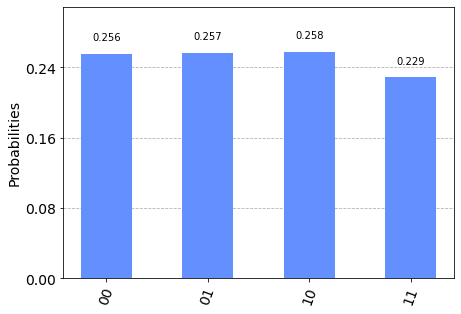

In [300]:
# run circuit 1024 times on the simulator to accumulate a probability distribution of the 1024 measurement outcomes
z_meas_counts = execute(circ_after_inv, backend=backend, shots=1024).result().get_counts()

# plot a histogram of the measurement outcomes
plot_histogram(z_meas_counts)

Hence, our chances are getting the solution are as good as a  guess-and-check strategy; we are going to need to do a little more than this.

Grover's quantum search algorithm has an additional subroutine that performs the so called inversion about the mean, which has the effect of increasing amplitudes with a negative phase (solution) while decreasing amplitudes with a positive phase (non-solutions), such that we perform measurements at the end, we measure the solution with high probability. The the action of the inversion about the mean operator, denoted by $\hat{U}_\text{inv}$, on a general state $\sum_j \alpha_j |j\rangle$ is given by:


\begin{align}
\hat{U}_\text{inv}\sum_{j=0}^{2^n - 1}\alpha_j|j\rangle=\sum_{j=0}^{2^n -1}\left(2 \langle \alpha \rangle - \alpha_j \right)|j\rangle 
\end{align}

where $\langle \alpha \rangle = \sum_{j=0}^{2^n -1} \alpha_j/2^{n/2}$ is the mean of the amplitudes $\alpha_k$.

The above operation amplifies the amplitudes of a tagged element $|j\rangle$, since the corresponding amplitdue $\alpha_j$ would be negative (new amplitude is $2\langle \alpha \rangle + |\alpha_j|$), while the probability amplitude of rest of the elments  $\alpha_l$ for $l \neq j$ are positive are surprassed (new amplitude is $2\langle \alpha \rangle - |\alpha_l|$)). I have left as an exercise for the reader to verify that aforesaid operator can be expressed as

\begin{align}
\hat{U}_\text{inv} = \hat{H}^{\otimes n}U_\text{cond}\hat{H}^{\otimes n}
\end{align}

where $\hat{H}^{\otimes n}$ is a Hadamard gate applied to all qubits, and the middle operation performs a similar to the oracle operation $U_{O}$, namely a conditional phase shift on all the elements except the element $|00\rangle=|0\rangle$.


\begin{align}
 U_\text{cond}|x\rangle = 
 \begin{cases}
    |x\rangle & x = 0,\\
   -|x\rangle  & x\neq 0
 \end{cases}
\end{align}

Let's implement the inversion about the mean operator $U_\text{inv}$ as a quantum circuit with Qiskit. We begin by implementing the circuit for $U_\text{cond}$, which closely resembles $U_\text{O}$

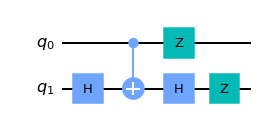

In [301]:
# Create quantum circuit with 2 qubits
U_cond = QuantumCircuit(2, name="U_cond")

# build on circuit for U_cond
U_cond.h(1)
U_cond.cx(0, 1)
U_cond.h(1)
U_cond.z(0)
U_cond.z(1)

# draw circuit
U_cond.draw(output="mpl")

The above circuit corresponds to the matrix

\begin{align}
U_\text{cond} = 
    \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & -1 & 0 & 0  \\
    0 & 0 & -1 & 0 \\
    0 & 0 & 0 & -1
    \end{bmatrix}
\end{align}

This a special of the our parameterized $U_{O}$, I have left as an exercise for the reader to verify that the above matrix does the desired operation and find the values of $\alpha, \beta$ for $U_{O}$ that correspond to the above matrix.

### Exercise 

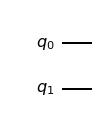

In [302]:
# Create quantum circuit with 2 qubits
circ_cond = QuantumCircuit(2)

# initialize qubits to zero 
# ...

# apply U_cond
# ..

# draw circuit
circ_cond.draw(output="mpl")

In [303]:
# print out state vector to verify that a phase is applied to |00>
# ...

Finally, we arrive at the inversion about the mean operation by acting with $H^{\otimes n}$ on the left and right of $U_\text{cond}$.

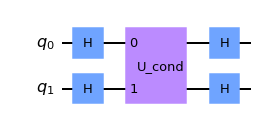

In [304]:
# Create quantum circuit with 2 qubits
U_inv = QuantumCircuit(2, name="U_inv")


# apply hadamard on both sides of the U_cond 
U_inv.h([0,1])
U_inv.append(U_cond, [0,1])
U_inv.h([0,1])

U_inv.draw(output="mpl")

The above circuit corresponds to the matrix

\begin{align}
U_\text{cond} = 
    \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & -1 & 0 & 0  \\
    0 & 0 & -1 & 0 \\
    0 & 0 & 0 & -1
    \end{bmatrix}
\end{align}

### Putting all together

The procedure of the Grover's search algorithm is as follows:

1. Prepare an initial state that is a superposition of all possible elements

\begin{align}
H^{\otimes n} |0\rangle^{\otimes n} =|\psi\rangle = \frac{1}{2^{n/2}}\sum_{j=0}^{2^n -1} |j\rangle
\end{align}

2. Query oracle by applying the operation $\hat{U}_{O}$ 

\begin{align}
\hat{U}_{O}|\psi\rangle = \frac{1}{2^{n/2}}\sum_{j=0}^{2^n -1} \hat{U}_{O}|j\rangle
\end{align}

3. Apply the mean-inversion-about-the operation

\begin{align}
\hat{U}_{inv} \hat{U}_{O}|\psi\rangle = \frac{1}{2^{n/2}}\sum_{j=0}^{2^n -1} \hat{U}_{inv} \hat{U}_{O}|j\rangle
\end{align}

4. Repeat step 2 and 3 $k = \mathcal{O}(2^{n/2})$ times (only once for this example)

\begin{align}
(\hat{U}_{inv} \hat{U}_{O})^{k}|\psi\rangle = \frac{1}{2^{n/2}}\sum_{j=0}^{2^n -1} (\hat{U}_{inv} \hat{U}_{O})^{k}|j\rangle
\end{align}

5. Measure $n$ all qubits

### Run Grover's algorithm on noiseless simulator

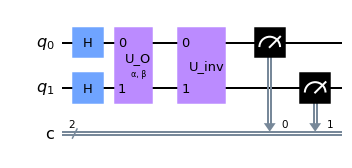

In [305]:
# Create quantum circuit with 2 qubits and 2 classical bits
grover = QuantumCircuit(2, 2)

# apply hadamard to both qubits to prepare uniform superposition
grover.h([0, 1])

# apply U_O
grover.append(U_O, [0, 1])

# apply U_inv
grover.append(U_inv, [0, 1])

# measure both qubits
grover.measure([0, 1], [0, 1])


grover.draw(output="mpl")

In [306]:
# Oracle tags
# (0, 0) - Oracle tags 11
# (0, π) - Oracle tags 01
# (π, 0) - Oracle tags 10
# (π, π) - Oracle tags 00

tags = [
    (0, 0), 
    (0, -np.pi), 
    (-np.pi, 0), 
    (-np.pi, -np.pi)
]

# Bind parameters to circuits for the four different cases: 11, 01, 10 and 00, respectiely.
circuits = [
    grover.bind_parameters({alpha: alpha_val, beta: beta_val}) for alpha_val, beta_val in tags
]

# run circuit 1024 times on the simulator to accumulate a probability distribution of the 1024 measurement outcomes
grover_result = execute(circuits, backend=backend, shots=1024).result()

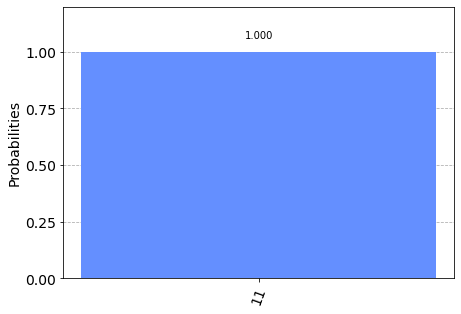

In [307]:
# plot a histogram of the measurement outcomes
plot_histogram(grover_result.get_counts(0))

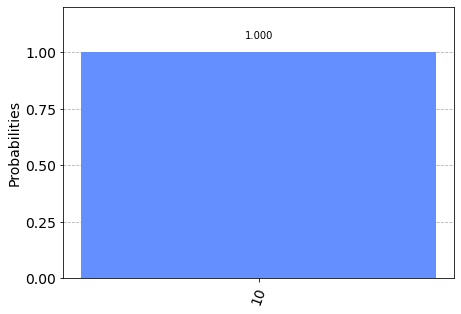

In [308]:
# plot a histogram of the measurement outcomes
plot_histogram(grover_result.get_counts(1))

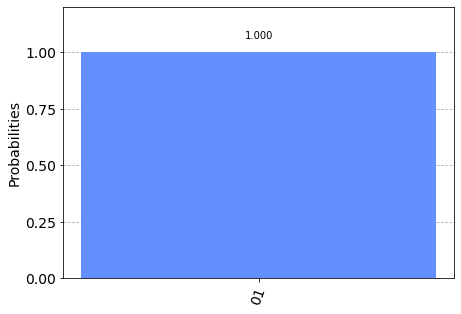

In [309]:
# plot a histogram of the measurement outcomes
plot_histogram(grover_result.get_counts(2))

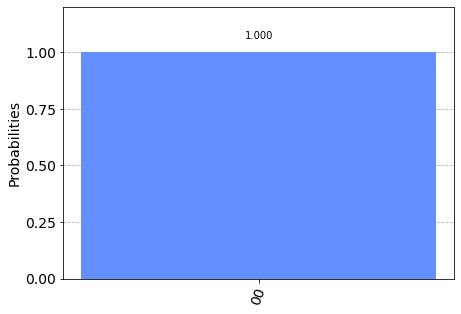

In [310]:
# plot a histogram of the measurement outcomes
plot_histogram(grover_result.get_counts(3))

We see that in each case, the tagged element in our search space is remarkably found hundred percent of time! And this was achieved in only a single iteration of Grover's algorithm, in comparison to the classical solution, where on average we would had to make two guesses and in the worst case scenario, we would have had to make four guesses! More generally, Grover's algorithm takes $O(\sqrt{N})$ Grover iterations (and thus oracle calls) must be performed in order to obtain a solution to the search problem with a high probability, a quadratic improvement over the $O(N)$ oracle calls required classically. A quadratic speed up!

### Run Grover's algorithm on  noisy simulation

In reality, real devices do not operate under ideal conditions, and various sources of noise, for example thermal fluctuations, in the surrounding environment introduce errors to a quantum computation, in such way, that the meausurement outcomes we observe deviate from what we ideally expect. In the case where this is severe enough, we cannot reliably run a quantum computation and hope to extract meaningful results. To simulate a noisy device, we can also use `Aer` to simulate the noise models of actual devices.

In [311]:
# import aer noise model
from qiskit.providers.aer.noise import NoiseModel

# IBM Q
from qiskit import IBMQ
 
# load provider
provider = IBMQ.load_account()

# get real backend 
real_backend = provider.get_backend('ibmq_manila')

# Build noise model from its backend properties
noise_model = NoiseModel.from_backend(real_backend)

ibmqfactory.load_account:WARNING:2022-10-04 21:29:35,995: Credentials are already in use. The existing account in the session will be replaced.


In [312]:
# execute the grover circuits on the noisy simulator
noisy_grover_result = execute(circuits, backend=backend, shots=1024, noise_model=noise_model).result()

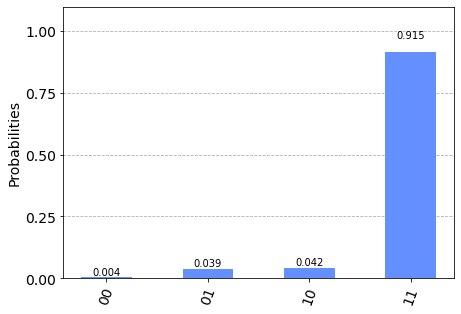

In [313]:
# plot a histogram of the measurement outcomes
plot_histogram(noisy_grover_result.get_counts(0))

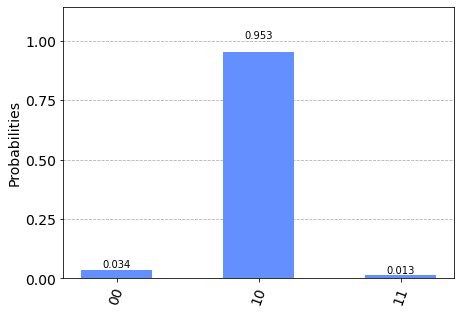

In [314]:
# plot a histogram of the measurement outcomes
plot_histogram(noisy_grover_result.get_counts(1))

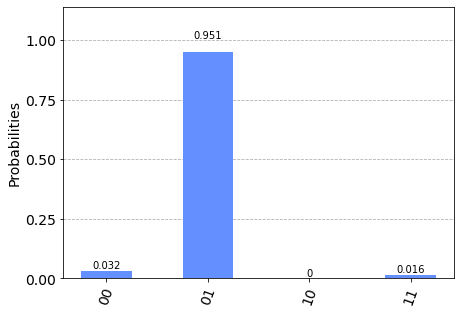

In [315]:
## plot a histogram of the measurement outcomes
plot_histogram(noisy_grover_result.get_counts(2))

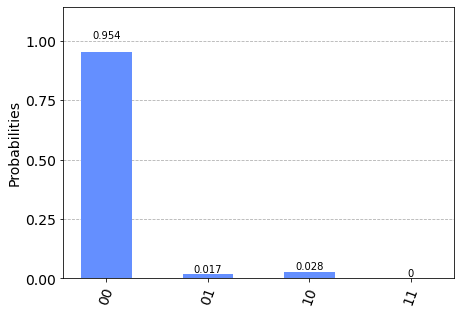

In [316]:
## plot a histogram of the measurement outcomes
plot_histogram(noisy_grover_result.get_counts(3))

Even in the presence noise, in each scenario, we still recover the tagged element with a high probability!

## References

[0] Qiskit, 'Start learning in the way best for you', https://qiskit.org/learn/ 

[1] D. Deutsch, 'Quantum theory, the Church-Turing principle and the universal quantum computer', _Proceedings of the Royal Society of London_ **A 400**, pp. 97-117 (1985).  https://doi.org/10.1098/rspa.1985.0070

[2] R. P. Feynman, 'Simulating physics with computers',  _Int J Theor Phys_ **21**, 467–488 (1982). https://doi.org/10.1007/BF02650179

[3] L. K. Grover, 'A fast quantum mechanical algorithm for database search', _Proceedings of the 28th Annual ACM Symposium on the Theory of Computing_ (1996), https://doi:10.1145/237814.237866

In [317]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright